In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
base_vendas = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
base_vendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
pip install 'https://github.com/pandas-profiling/pandas-profiling/archive/master.zip'

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=095706f36d74192e92ea52db53b2dcb02c5a20049125099d3581bbb62f9f1d8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-75vq0iug/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(base_vendas, title = 'Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file='kmeans.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


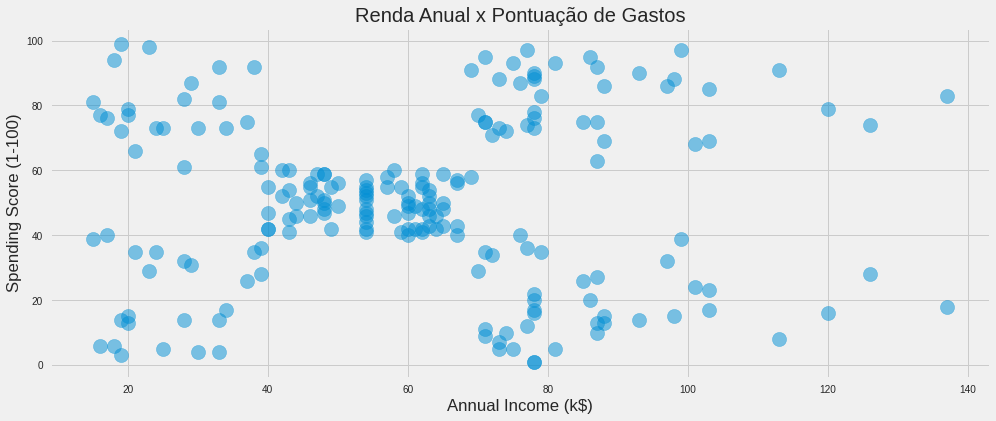

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=base_vendas, s=200, alpha=0.5)
plt.title('Renda Anual x Pontuação de Gastos')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

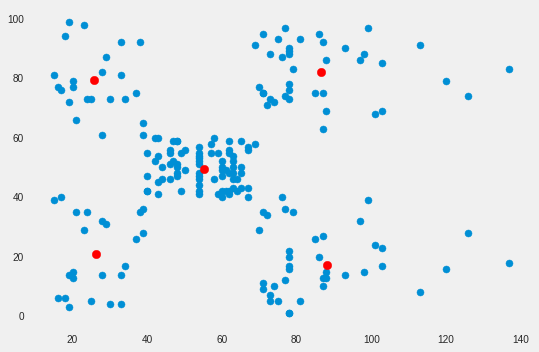

In [ ]:
x2 = base_vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10)
pred_y = kmeans.fit_predict(x2)

km = kmeans.cluster_centers_

plt.scatter(x2[:,0], x2[:,1])
plt.grid()
plt.scatter(km[:,0], km[:,1], s=70, c='red')
plt.show()

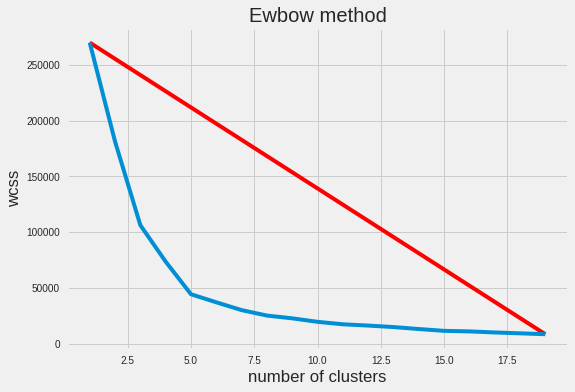

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.plot([1,19], [wcss[0],wcss[len(wcss)-1]], c='red')
plt.plot(range(1,20),wcss)
plt.title('Ewbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
44448.45544793371


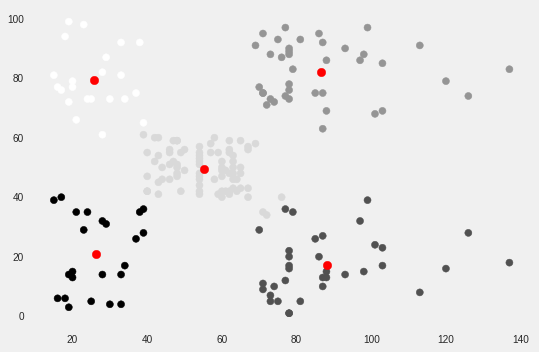

In [ ]:
x2 = base_vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10)
pred_y = kmeans.fit_predict(x2)

km = kmeans.cluster_centers_

print(km)
print(kmeans.inertia_)

plt.scatter(x2[:,0], x2[:,1], c=pred_y)
plt.grid()
plt.scatter(km[:,0], km[:,1], s=70, c='red')
plt.show()

In [ ]:
base_vendas['Group'] = pd.Series(pred_y, index=base_vendas.index)

In [ ]:
newdf = base_vendas.query('Group == "2"')
newdf

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2
141,142,Male,32,75,93,2
